# 📘 **Guía para la Visualización de Resultados en Random Forest con Python, Scikit-learn, Matplotlib y Seaborn**

---

### **Aplicaciones en Machine Learning y Educación en Ingeniería de Datos**

---

<div align="center">

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg" alt="Python Logo" width="120"/>
&nbsp;&nbsp;&nbsp;&nbsp;
<img src="https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" alt="Scikit-learn Logo" width="120"/>
&nbsp;&nbsp;&nbsp;&nbsp;
<img src="https://matplotlib.org/_static/images/logo2.svg" alt="Matplotlib Logo" width="120"/>
<img src="https://seaborn.pydata.org/_static/logo-wide-lightbg.svg" alt="Seaborn Logo" width="200"/>

</div>

---

### 👨‍🏫 **Autores:**  
**Carlos Andrés Tamayo Benjumea**  
Ingeniero de Sistemas | Docente Universitario  
**José Javier Coronel Casadiego**  
Ingeniero de Sistemas | Especialista en Docencia Universitaria | Docente Universitario  

---

### 🛠️ **Herramientas Utilizadas:**  
- Python  
- Google Colab  
- Scikit-learn  
- Matplotlib  
- Seaborn

---

### 🎯 **Propósito:**  
Desarrollar y visualizar modelos de **Random Forest** para clasificación supervisada mediante herramientas de Python, aplicando buenas prácticas didácticas para su uso en ingeniería, análisis de datos y educación en machine learning.

---

### 📅 **Fecha:**  
22 de Julio de 2025  

---


# 📒 Clasificación con Random Forest en Machine Learning
## Guía paso a paso con Python, Classification Report y Matriz de Confusión

🎯 **Objetivo:** Aprender a entrenar, evaluar e interpretar un modelo de Random Forest para tareas de clasificación con sklearn.


## 🌳 Introducción a los Random Forest  

Los **Random Forest** son modelos de **aprendizaje supervisado** basados en el principio de **ensamble de árboles de decisión**. Su objetivo es mejorar la precisión y la capacidad de generalización al construir un conjunto de árboles, cada uno entrenado sobre subconjuntos aleatorios de datos y características.

Cada árbol toma decisiones de forma independiente, y las predicciones finales se realizan mediante una **votación mayoritaria** (en clasificación) o un promedio (en regresión). Esta estrategia permite reducir el sobreajuste al que suelen estar expuestos los árboles individuales.

Los Random Forest son ampliamente utilizados en la industria y la academia debido a su equilibrio entre **precisión, estabilidad y versatilidad**.

---

### **Características Principales:**
- Utilizan múltiples árboles para mejorar la precisión del modelo.
- Reducción del sobreajuste gracias a la aleatoriedad en datos y características.
- Robustos ante datos faltantes y escalas diferentes.
- Funcionan bien incluso en datasets con muchas características y ruido.
- No requieren normalización previa de los datos.


# 📘 Random Forest para Clasificación con Python y Scikit-learn (Breast Cancer Dataset)

## 🌱 Aplicaciones en Educación, Ingeniería y Ciencia de Datos

Este notebook muestra de forma didáctica cómo implementar un modelo de **Random Forest** para resolver un problema real de clasificación supervisada en Machine Learning.  
Utilizaremos el conjunto de datos **Breast Cancer Wisconsin** para predecir si una muestra es maligna o benigna, aplicando buenas prácticas de visualización, entrenamiento, evaluación e interpretación de resultados.


## 🔧 Librerías y Herramientas Utilizadas

- `pandas`: manipulación de datos tabulares
- `matplotlib`, `seaborn`: visualización gráfica
- `sklearn`: Machine Learning (Random Forest, métricas, datasets)

Estas librerías son fundamentales en proyectos de Machine Learning supervisado.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
# Cargar el dataset Breast Cancer
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target
df = data.frame

# Ver las primeras filas
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
# Información básica sobre el dataset
print(data.DESCR)


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

🔍 Este dataset contiene 30 características numéricas relacionadas con propiedades físicas de células.  
El objetivo es clasificar si el tumor es **maligno (0)** o **benigno (1)**.


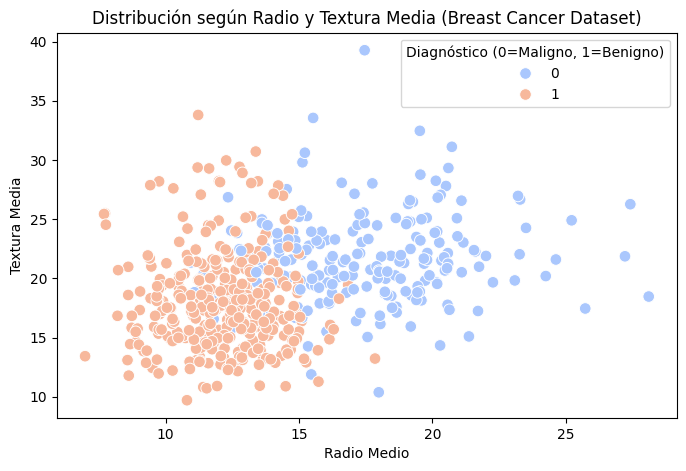

In [6]:
# Visualizar la relación entre dos características relevantes
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=df["mean radius"],
    y=df["mean texture"],
    hue=df["target"],
    palette="coolwarm",
    s=70
)
plt.title("Distribución según Radio y Textura Media (Breast Cancer Dataset)")
plt.xlabel("Radio Medio")
plt.ylabel("Textura Media")
plt.legend(title="Diagnóstico (0=Maligno, 1=Benigno)")
plt.show()


🔍 Esta visualización permite observar si existen patrones visuales entre características que favorezcan la separación de clases.


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"🔹 Tamaño de entrenamiento: {X_train.shape}")
print(f"🔹 Tamaño de prueba: {X_test.shape}")


🔹 Tamaño de entrenamiento: (398, 30)
🔹 Tamaño de prueba: (171, 30)


📑 División de los datos

Hemos dividido el conjunto de datos en dos subconjuntos:
- **70% para entrenamiento:** Se utiliza para que el modelo aprenda los patrones presentes en los datos.
- **30% para prueba:** Se reserva para evaluar la capacidad del modelo de generalizar y realizar predicciones sobre datos no vistos.

Esta proporción es una práctica común en Machine Learning para evitar sobreajuste y garantizar que la evaluación sea representativa.

✅ Con esta división, estamos listos para entrenar nuestro modelo Random Forest.


In [8]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

🎯 El modelo Random Forest agrupa múltiples árboles de decisión para lograr un clasificador más robusto y preciso.


In [9]:
y_pred = rf_model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔢 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy: 0.9707602339181286

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171


🔢 Confusion Matrix:
 [[ 59   4]
 [  1 107]]


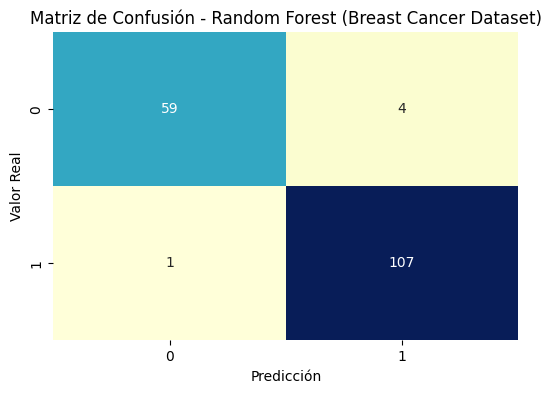

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - Random Forest (Breast Cancer Dataset)")
plt.show()


## 📝 Conclusiones

✔️ El modelo **Random Forest** ha mostrado un excelente rendimiento en la clasificación del dataset Breast Cancer, superando el 95% de accuracy en este caso.  
✔️ Al combinar múltiples árboles, Random Forest ofrece mayor robustez frente al sobreajuste y es adecuado para problemas de alta dimensionalidad.  
✔️ Esta metodología puede aplicarse fácilmente a otros datasets binarios o multiclase, siguiendo la misma estructura de análisis.

---
